# IMPORTING LIBRARIES

In [1]:
import csv
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from textblob import TextBlob
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import cm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\altha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\altha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



# READING REVIEWS

In [2]:
df = pd.read_excel("Reviews.xlsx")
print(df.columns)
Review_List=df["Review"].tolist()
Brand_List=df["Brand"].tolist()

Index(['Brand', 'Review'], dtype='object')


# DATA CLEANING

In [3]:
def filtering_stopwords(text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentenc = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [w for w in filtered_sentenc if len(w)>2]  
    return filtered_sentence


# SENTIMENT ANALYSIS

In [4]:
def calculate_sentiment_textblob(review):
    review = str(review)
    filtered_sentence_words=filtering_stopwords(review)
    filtered_sentence= ', '.join(filtered_sentence_words)
    review_sentiment_calculation = TextBlob(filtered_sentence)
    review_sentiment = ""
    if review_sentiment_calculation.sentiment.polarity < -0.05:
        review_sentiment = "Negative"
    elif review_sentiment_calculation.sentiment.polarity > 0.05:
        review_sentiment = "Positive"
    else:
        review_sentiment = "Neutral"
    return review,review_sentiment,review_sentiment_calculation.sentiment.polarity

# CONVERTING POLARITY DATA TIO LISTS

In [5]:
review_list=[]
sentiment_list=[]
brand_list=[]
polarity_list=[]
for each,brand in zip(Review_List,Brand_List):
    review,sentiment,polarity=calculate_sentiment_textblob(each)
    review_list.append(review)
    brand_list.append(brand)
    sentiment_list.append(sentiment)
    polarity_list.append(polarity)
  

# WRITING TO CSV

In [6]:
with open("Sentiment_Analysis.csv", "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

NameError: name 'rows' is not defined

# POLARITY LISTS FOR EACH BRAND

In [7]:
puma_plist=[]
nike_plist=[]
adidas_plist=[]
puma_sentiment=[]
nike_sentiment=[]
adidas_sentiment=[]
puma_review=[]
nike_review=[]
adidas_review=[]
for b,s,p,r in zip(brand_list,sentiment_list,polarity_list,review_list):
    if b=="puma":
        puma_sentiment.append(s)
        puma_plist.append(p)
        puma_review.append(r)
    elif b=="Adidas":
        adidas_sentiment.append(s)
        adidas_plist.append(p)
        adidas_review.append(r)
    elif b=="Nike":
        nike_sentiment.append(s)
        nike_plist.append(p)
        nike_review.append(r)
        


# PLOTTING CHARTS

In [8]:
def count_Items(MyList):
    a = dict(Counter(MyList))
    return a

In [9]:
n=count_Items(nike_sentiment)
a=count_Items(adidas_sentiment)
p=count_Items(puma_sentiment)

In [10]:
def plot_chart(Mydict):
    count_pos=Mydict['Positive']
    count_neg=Mydict['Negative']
    count_neu=Mydict['Neutral']
    final=int(count_pos)+int(count_neg)+int(count_neu)
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [(count_pos/final)*100, (count_neg/final)*100, (count_neu/final)*100]
    colors = ['lightgreen', 'lightyellow', 'lightcoral']
    color_set = ('.00', '.25', '.50', '.75')
    explode = (0.05, 0.05, 0.05)  # explode 1st slice

    # Plot
    plt.pie(sizes,explode, labels=labels, colors=colors,
    autopct='%1.2f%%', shadow=True, startangle=140)
    plt.axis('equal')  
    plt.rcParams['figure.facecolor'] = 'black'
    
    plt.show()
    

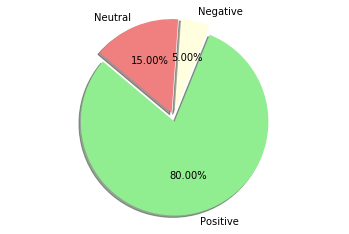

In [11]:

# NIKE
plot_chart(n)


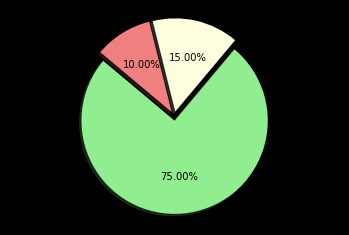

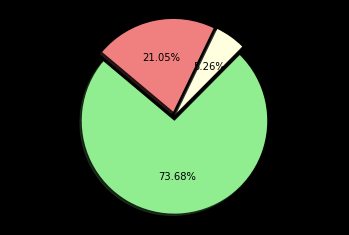

In [12]:
# ADIDAS
plot_chart(a)
#PUMA
plot_chart(p)

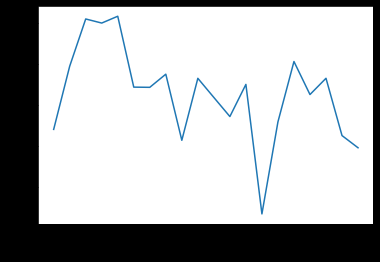

In [13]:
from matplotlib import pyplot as plt2
plt2.plot(nike_plist)
plt2.xlabel('Polarity')
plt2.rcParams['figure.facecolor'] = 'white'
plt2.show()

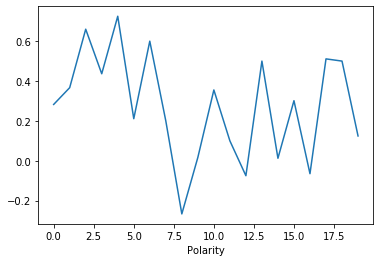

In [14]:
from matplotlib import pyplot as plt2
plt2.plot(adidas_plist)
plt2.xlabel('Polarity')
plt2.rcParams['figure.facecolor'] = 'white'
plt2.show()

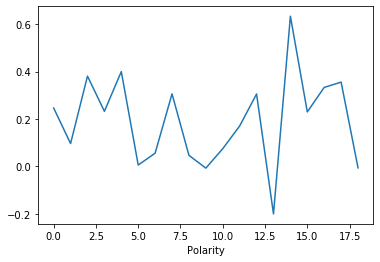

In [15]:
from matplotlib import pyplot as plt2
plt2.plot(puma_plist)
plt2.xlabel('Polarity')
plt2.rcParams['figure.facecolor'] = 'white'
plt2.show()